In [2]:
import numpy as np
from scipy.ndimage.filters import minimum_filter
import matplotlib.pyplot as plt 

C:\Users\TQC User\AppData\Local\Temp\ipykernel_23036\3913532573.py:2: DeprecationWarning: Please use `minimum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import minimum_filter


In [22]:
data = np.array([[2, 100, 100, -5],
        [-10, 9, 180, 0],
        [112, 10, 111, 100],
        [50, 110, 50, 140]])


minima = (data == minimum_filter(data, len(data), mode='constant', cval=0.0))
# print(data)
# print(minima)

print(minima)
res = np.where(1 == minima)
print(res[0][1])

[[False False False  True]
 [ True False False False]
 [False False False False]
 [False False False False]]
1


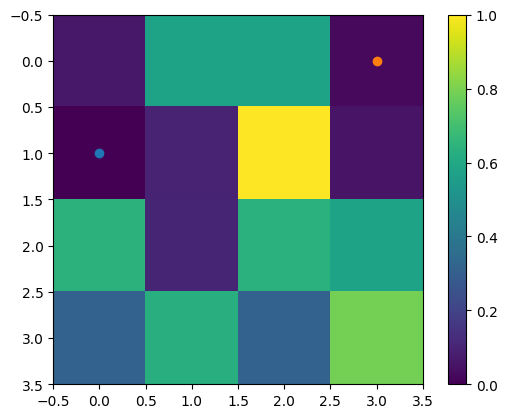

In [8]:
plt.figure() 
plt.imshow(data)
plt.scatter(0,1)
plt.scatter(3,0) 
plt.colorbar() 
plt.show() 

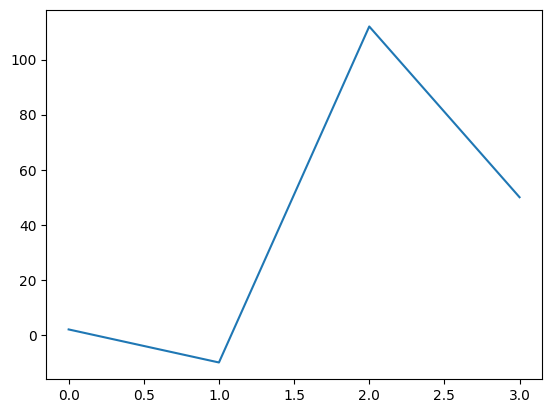

In [11]:
plt.plot(data[:,0])

## Testing the neighborhood implementation

In [1]:
from vortex_neighborhood_scaps2 import GPETimeEv as gpev

In [2]:
import matplotlib.pyplot as plt
import numpy as np


To Do: 
- Fix the function by splitting it up into initialization and updates 
- Store the vortex coordinates in an array 
- Delete the most recent vortex coordinate entry if the coordinates are an edge case - add a new adjusted coordinate in the if statement to replace it 
- Test initialization first and confirm the rest works 
- Figure out how to track vortices when two or more are in the same window
- Create animation that includes a dot that tracks the vortex centers during the animation

For run time purposes: 
- Try using sparse = True for meshgrid 
- Else try manually making the window part of the animation more spread out by adding this array to the existing 1D axes with wider points then performing meshgrid 

In [3]:
g = gpev(L = 50, dtcoef = 0.05, dim = 2, numImagSteps= 500, numRealSteps = 1, dist = 3, antiV = False) # something is causing the window to not shift - fix ths?? 
# Also - write code to accomodate for the possibility of two vortices in the same ROI 

ValueError: non-broadcastable output operand with shape (1,1024) doesn't match the broadcast shape (1024,1024)

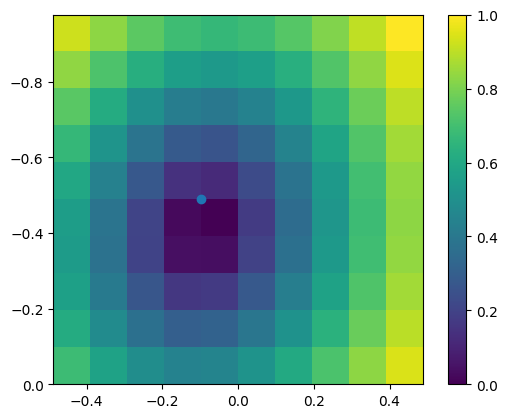

In [4]:
plt.figure() 
plt.imshow(g.searchArea, extent = [g.xneighborhoodAxis[0], g.xneighborhoodAxis[-1], g.yneighborhoodAxis[-1], g.yneighborhoodAxis[0]])
plt.scatter(g.xneighborhoodAxis[g.vort_coords[0][0]], g.yneighborhoodAxis[g.vort_coords[0][1]])
#plt.vlines(0, -0.5, 0.5)
#plt.hlines(0, -0.5, 0.5)
plt.colorbar()
plt.show() 

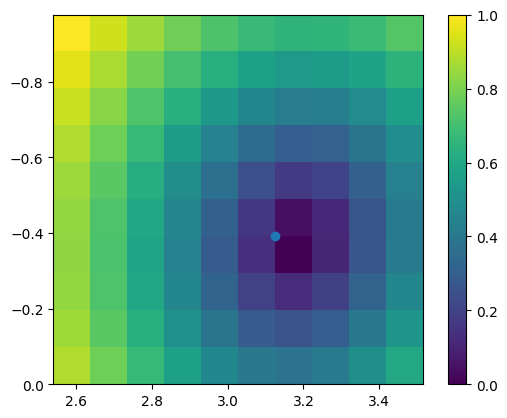

In [5]:
plt.figure() 
plt.imshow(g.searchArea2,extent = [g.xneighborhoodAxis2[0], g.xneighborhoodAxis2[-1], g.yneighborhoodAxis[-1], g.yneighborhoodAxis[0]],)
plt.scatter(g.xneighborhoodAxis2[g.vort_coords2[0][0]], g.yneighborhoodAxis[g.vort_coords2[0][1]])
#plt.vlines(3, -0.5, 0.5)
#plt.hlines(0, 2.5, 3.3)
plt.colorbar()
plt.show() 

In [20]:
print(g.neighborhoodAxis2[g.vort_coords2[0][0]])

3.125


In [23]:
print(g.neighborhoodAxis2)

[1.953125   2.05078125 2.1484375  2.24609375 2.34375    2.44140625
 2.5390625  2.63671875 2.734375   2.83203125 2.9296875  3.02734375
 3.125      3.22265625 3.3203125  3.41796875 3.515625   3.61328125
 3.7109375  3.80859375 3.90625   ]


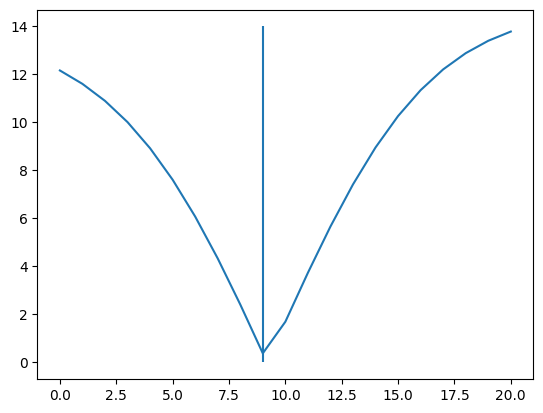

In [33]:
plt.figure() 
plt.plot(g.searchArea[len(g.searchArea)//2])
plt.vlines(9, 0 , 14)
plt.show() 

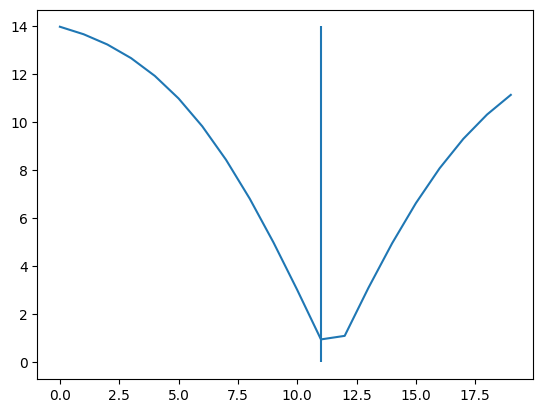

In [10]:
plt.figure() 
plt.plot(g.searchArea2[len(g.searchArea2)//2])
plt.vlines(11, 0 , 14)
plt.show() 

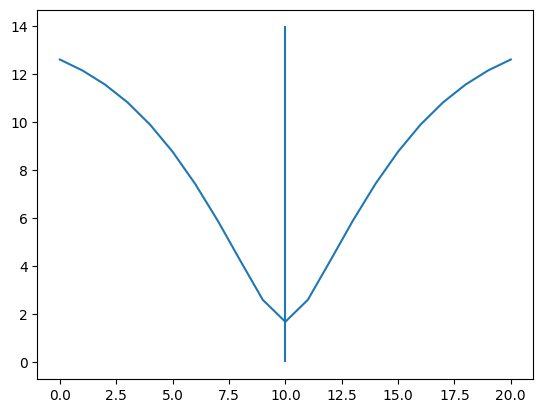

In [27]:
plt.figure() 
plt.plot(g.searchArea[:,len(g.searchArea)//2])
plt.vlines(10, 0 , 14)
plt.show() 

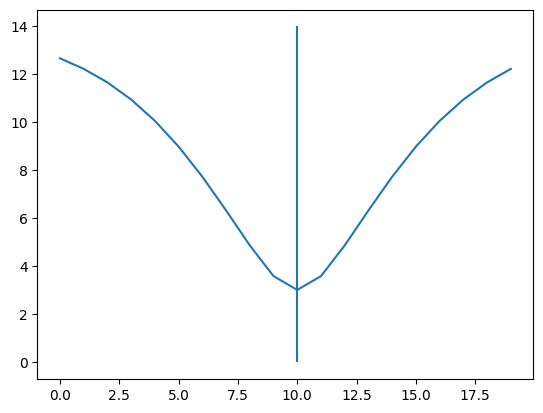

In [11]:
plt.figure() 
plt.plot(g.searchArea2[:,len(g.searchArea2)//2])
plt.vlines(10, 0 , 14)
plt.show() 

In [35]:
print(g.searchArea[0])

[13.4944442  13.37153303 13.24001125 13.10316649 12.9663008  12.83684866
 12.7240495  12.63803261 12.58833029 12.58208096 12.62241438 12.70757045
 12.83109592 12.98306462 13.151896   13.32620129 13.49619811 13.65448355
 13.79619386 13.91872074 14.02119151]


In [4]:
vl = np.array(g.vortex_locs)

In [5]:
print(vl)

[]


In [6]:
plt.figure() 
plt.imshow(g.searchArea)
plt.show() 

AttributeError: 'GPETimeEv' object has no attribute 'searchArea'

<Figure size 640x480 with 0 Axes>

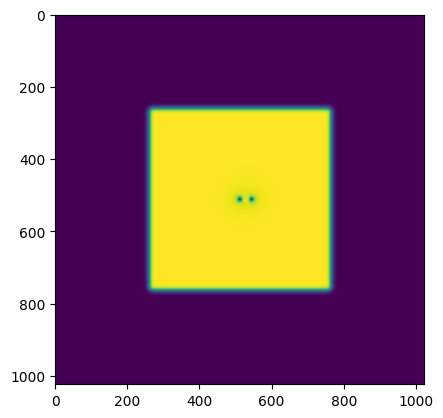

In [6]:
plt.figure() 
plt.imshow(np.abs(g.dynpsi) )
#plt.scatter(vl[-1])
plt.show() 

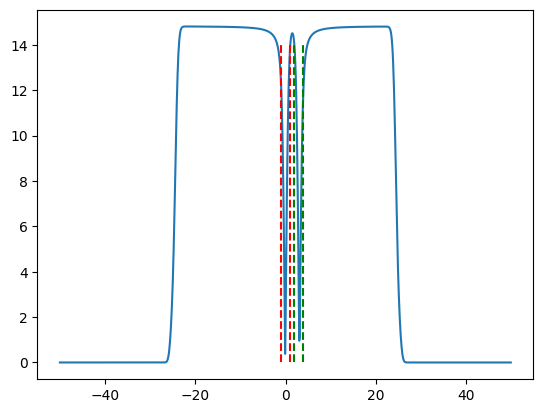

In [7]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.dynpsi)[len(g.dynpsi)//2])
plt.vlines(g.neighborhoodAxis[0], 0, 14, linestyle = '--', color = 'red')
plt.vlines(g.neighborhoodAxis[-1], 0, 14, linestyle = '--', color = 'red')
plt.vlines(g.neighborhoodAxis2[0], 0, 14, linestyle = '--', color = 'green')
plt.vlines(g.neighborhoodAxis2[-1], 0, 14, linestyle = '--', color = 'green')
plt.show() 

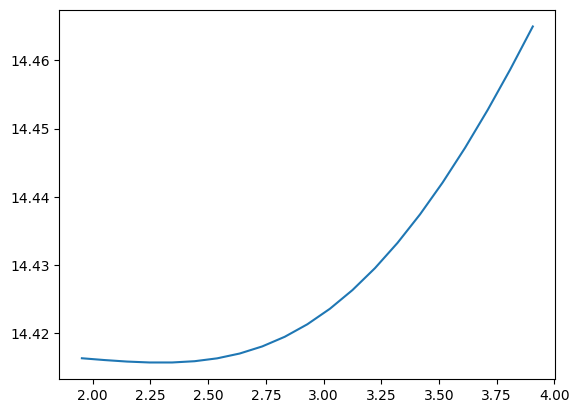

In [11]:
plt.figure()
plt.plot(g.neighborhoodAxis2, np.abs(g.searchArea2)[len(g.searchArea2)//2])
plt.show() 

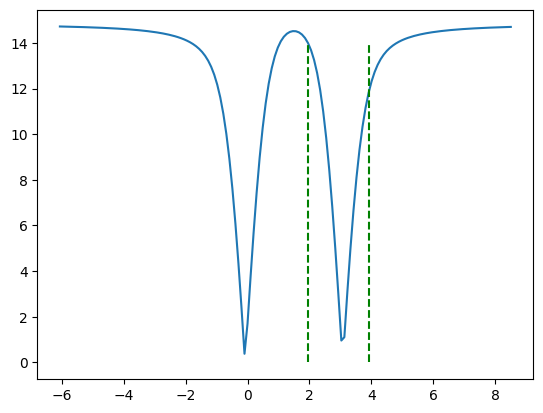

In [10]:
plt.figure() 
plt.plot(g.xi[0][0][450:600], np.abs(g.dynpsi)[len(g.dynpsi)//2][450:600])

plt.vlines(g.neighborhoodAxis2[0], 0, 14, linestyle = '--', color = 'green')
plt.vlines(g.neighborhoodAxis2[-1], 0, 14, linestyle = '--', color = 'green')
plt.show() 